In this notebook I classify based on description wheter given puzzle is sudoku variant or not(instead of classifying diffculty level).

## Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [3]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [5]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.14      0.25        97
           1       0.96      1.00      0.98      1903

    accuracy                           0.96      2000
   macro avg       0.89      0.57      0.61      2000
weighted avg       0.95      0.96      0.94      2000



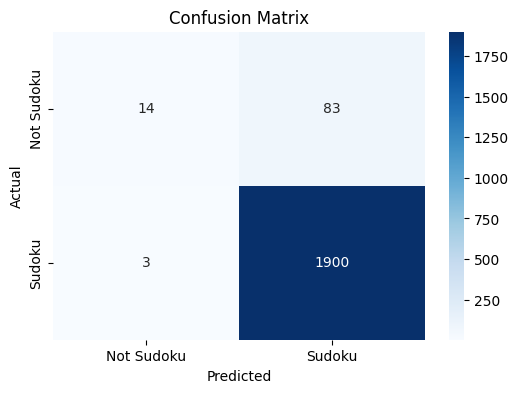

In [6]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

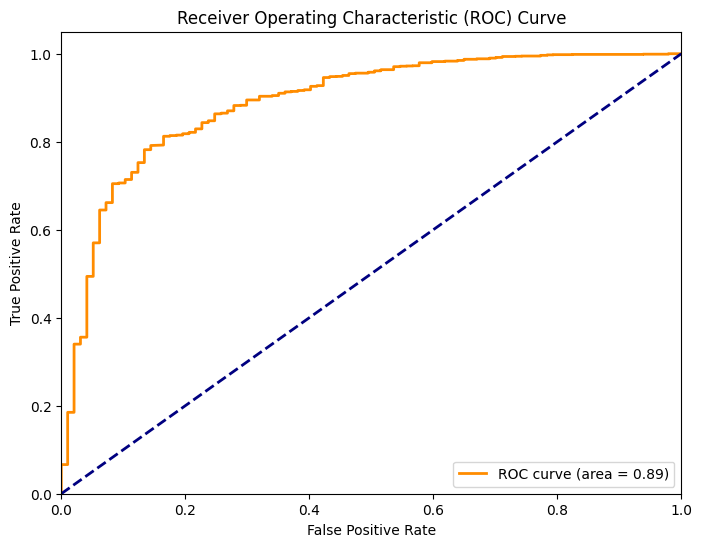

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## SVM

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [10]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
svm_classifier = SVC(kernel='rbf', probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [15]:
y_pred = svm_classifier.predict(X_test_scaled)
y_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        97
           1       0.96      1.00      0.98      1903

    accuracy                           0.96      2000
   macro avg       0.98      0.62      0.69      2000
weighted avg       0.96      0.96      0.95      2000



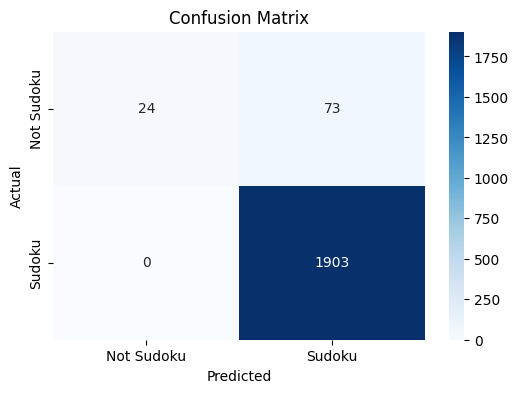

In [16]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

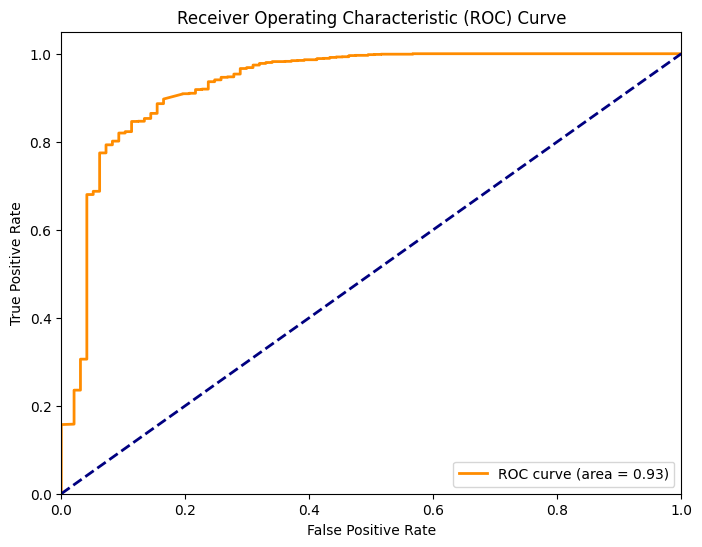

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [21]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.45      0.62        97
           1       0.97      1.00      0.99      1903

    accuracy                           0.97      2000
   macro avg       0.98      0.73      0.80      2000
weighted avg       0.97      0.97      0.97      2000



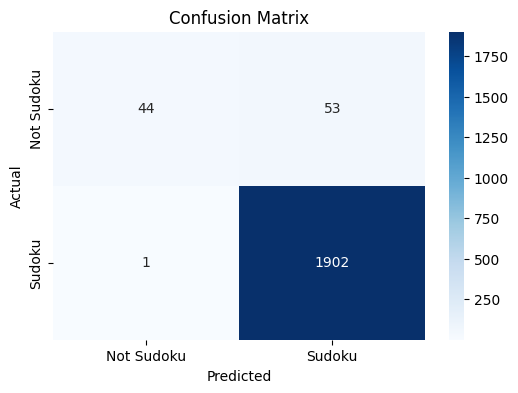

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

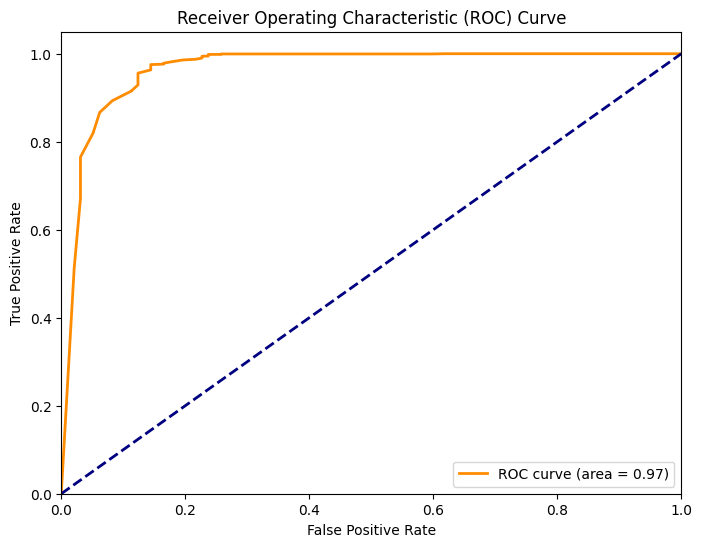

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Ensmeble Random Forest

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [3]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [5]:
X_train_sudoku = X_train[y_train == 1]  # Sudoku
X_train_non_sudoku = X_train[y_train == 0]  # Non-Sudoku
y_train_sudoku = y_train[y_train == 1]
y_train_non_sudoku = y_train[y_train == 0]

In [6]:
n_chunks = X_train_sudoku.shape[0] // X_train_non_sudoku.shape[0]

X_train_sudoku_dense = X_train_sudoku.toarray()

X_train_sudoku_chunks = np.array_split(X_train_sudoku_dense, n_chunks)
y_train_sudoku_chunks = np.array_split(y_train_sudoku, n_chunks)

/home/lewelotki/.cache/pypoetry/virtualenvs/sudoku-classifier-ImMA5acm-py3.10/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [7]:
rf_classifiers = []

for i in range(n_chunks):
    X_chunk = np.vstack((X_train_sudoku_chunks[i], X_train_non_sudoku.toarray()))
    y_chunk = np.hstack((y_train_sudoku_chunks[i], y_train_non_sudoku))
    
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_chunk, y_chunk)
    
    rf_classifiers.append(('rf_' + str(i), rf_classifier))

In [10]:
ensemble_model = VotingClassifier(estimators=rf_classifiers, voting='soft')

ensemble_model.fit(X_train.toarray(), y_train)

y_pred = ensemble_model.predict(X_test.toarray())
y_prob = ensemble_model.predict_proba(X_test.toarray())[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.45      0.62        97
           1       0.97      1.00      0.99      1903

    accuracy                           0.97      2000
   macro avg       0.98      0.73      0.80      2000
weighted avg       0.97      0.97      0.97      2000



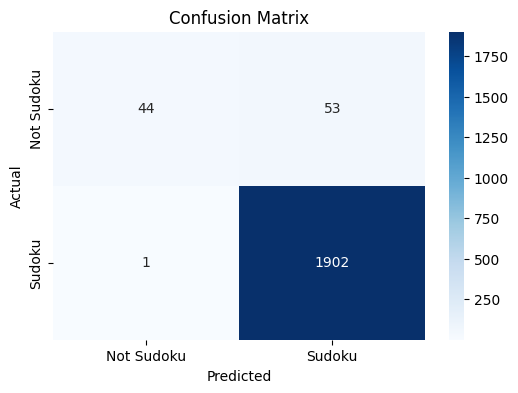

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

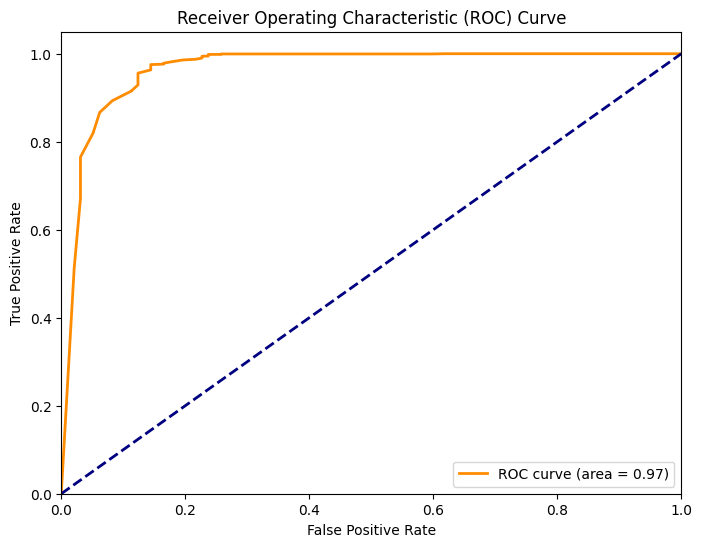

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Random Forest SMOTE

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [30]:
# pca = PCA(n_components=500, random_state=42)
# X_pca = pca.fit_transform(X_tfidf)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [39]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
rf_classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier_smote.predict(X_test)
y_prob = rf_classifier_smote.predict_proba(X_test)[:, 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       156
           1       0.98      1.00      0.99      2844

    accuracy                           0.98      3000
   macro avg       0.96      0.85      0.90      3000
weighted avg       0.98      0.98      0.98      3000



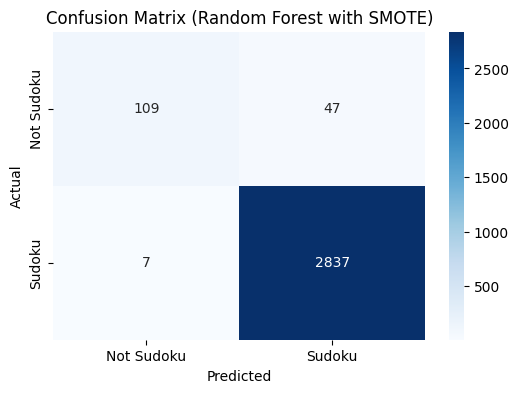

In [41]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

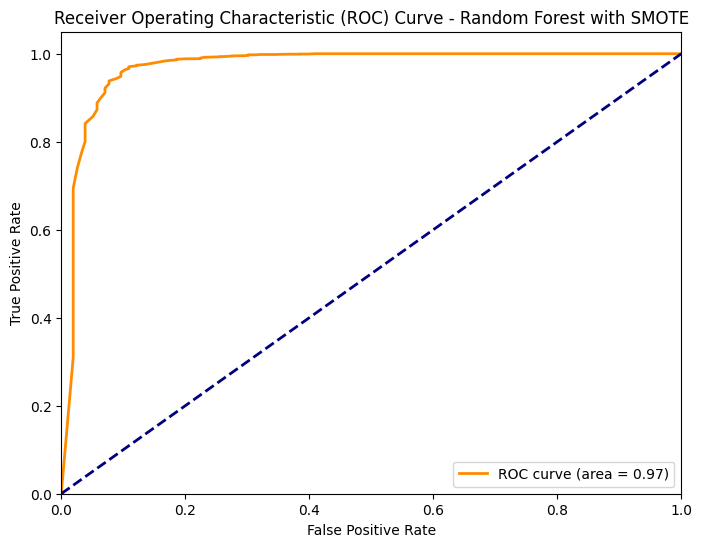

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest with SMOTE')
plt.legend(loc="lower right")
plt.show()

## Data Visualization

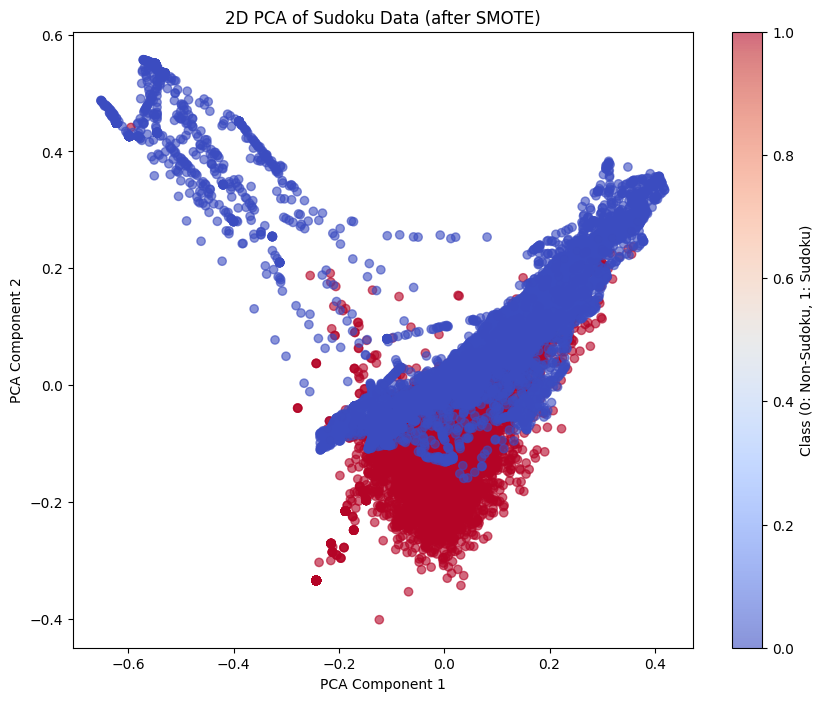

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_tfidf_dense = X_tfidf.toarray()

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_tfidf_dense, y)

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_smote)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_smote, cmap='coolwarm', alpha=0.6)
plt.title('2D PCA of Sudoku Data (after SMOTE)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Class (0: Non-Sudoku, 1: Sudoku)')
plt.show()

## Adjusting model

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv('../data/data_sudoku.csv')
X = df['features'] 
y = df['target'] 

pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [10, 20, None],  # Maximum depth of each tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

best_model = grid_search.best_estimator_

Best Hyperparameters: {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Best Cross-Validation Accuracy: 0.9831


In [3]:
df = pd.read_csv('../data/data_sudoku.csv')

X = df['features']
y = df['target']

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [8]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [22]:
rf_classifier_smote = RandomForestClassifier(
    n_estimators=50, 
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight={0: 3, 1: 1},
    random_state=42
)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier_smote.predict(X_test)
y_prob = rf_classifier_smote.predict_proba(X_test)[:, 1]

In [39]:
import numpy as np

y_prob = rf_classifier_smote.predict_proba(X_test)

threshold = 0.5
y_pred = np.where(y_prob[:, 0] > threshold, 0, 1)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       156
           1       0.99      0.99      0.99      2844

    accuracy                           0.98      3000
   macro avg       0.94      0.89      0.91      3000
weighted avg       0.98      0.98      0.98      3000

[[ 122   34]
 [  16 2828]]


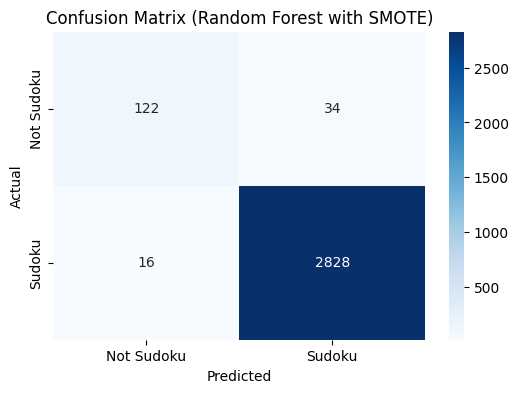

In [44]:
conf_mat = confusion_matrix(y_test, y_pred)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(conf_mat)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix (Random Forest with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

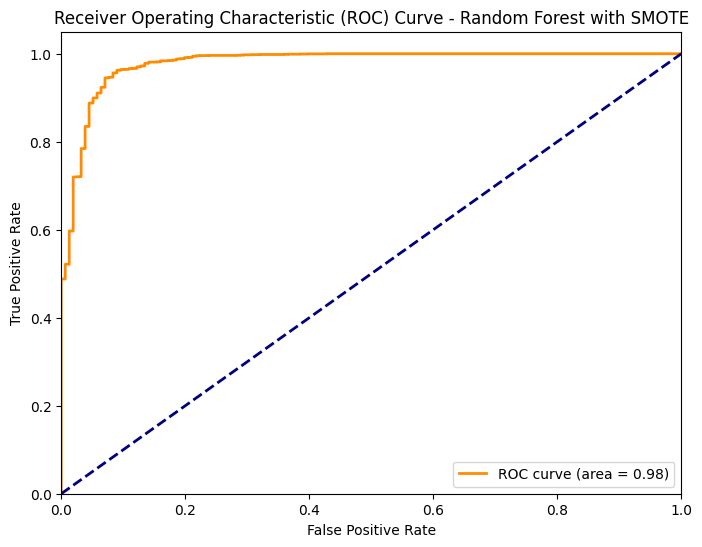

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest with SMOTE')
plt.legend(loc="lower right")
plt.show()

## Random Forest Binary features

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../data/data_sudoku.csv')

binary_features = [col for col in df.columns if col.startswith('has') and 'sudoku' not in col.lower()]
X = df[binary_features]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_classifier_smote = RandomForestClassifier(
    n_estimators=50, 
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight={0: 1.1, 1: 1},
    random_state=42
)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier_smote.predict(X_test)
y_prob = rf_classifier_smote.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71       149
           1       0.99      0.97      0.98      2851

    accuracy                           0.97      3000
   macro avg       0.80      0.91      0.84      3000
weighted avg       0.97      0.97      0.97      3000

Confusion Matrix:
 [[ 126   23]
 [  81 2770]]


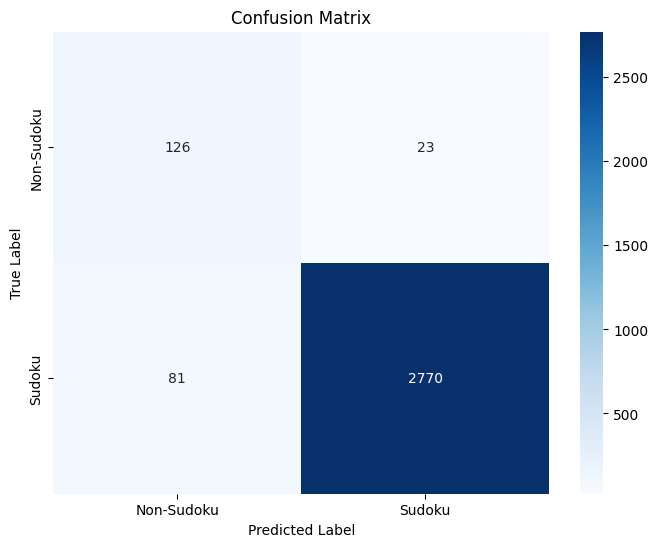

ROC AUC Score: 0.9683


In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Sudoku", "Sudoku"], yticklabels=["Non-Sudoku", "Sudoku"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

## Random Forest all features

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('../data/data_sudoku.csv')

binary_features = [col for col in df.columns if col.startswith('has') and 'sudoku' not in col.lower()]
X_binary = df[binary_features]

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df['features'])

import scipy
X_combined = scipy.sparse.hstack([X_tfidf, X_binary])

y = df['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_classifier_smote = RandomForestClassifier(
    n_estimators=50, 
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight={0: 3, 1: 1},
    random_state=42
)
rf_classifier_smote.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier_smote.predict(X_test)
y_prob = rf_classifier_smote.predict_proba(X_test)[:, 1]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       149
           1       0.99      0.99      0.99      2851

    accuracy                           0.98      3000
   macro avg       0.93      0.90      0.92      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix:
 [[ 120   29]
 [  17 2834]]


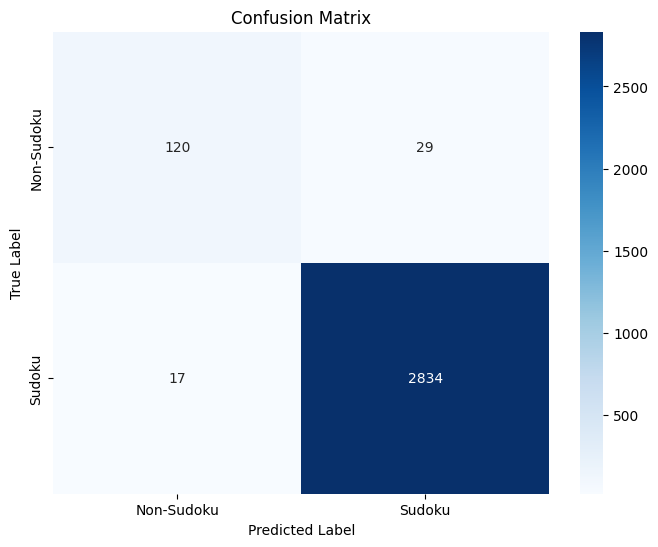

ROC AUC Score: 0.9908


In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Sudoku", "Sudoku"], yticklabels=["Non-Sudoku", "Sudoku"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")



## Dummy model (for comparison)

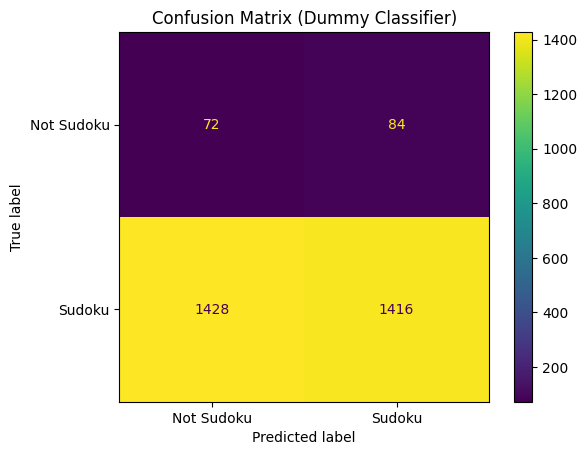

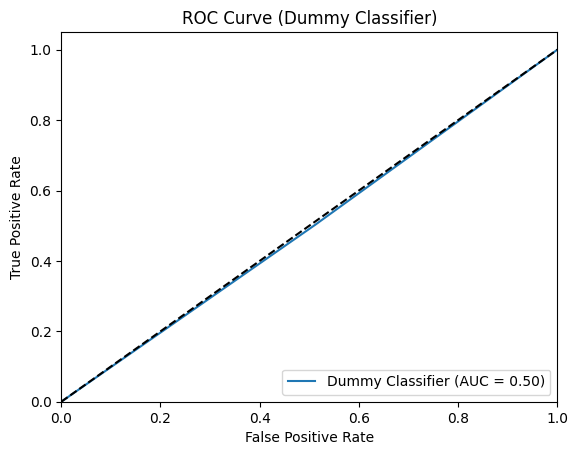

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

dummy_classifier = DummyClassifier(strategy="stratified")

dummy_classifier.fit(X_train_smote, y_train_smote)

y_pred_dummy = dummy_classifier.predict(X_test)

y_prob_dummy = dummy_classifier.predict_proba(X_test)[:, 1]

conf_matrix_dummy = confusion_matrix(y_test, y_pred_dummy)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dummy, display_labels=['Not Sudoku', 'Sudoku']).plot()
plt.title('Confusion Matrix (Dummy Classifier)')
plt.show()

fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_prob_dummy)

plt.figure()
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {roc_auc_score(y_test, y_prob_dummy):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Dummy Classifier)')
plt.legend(loc="lower right")
plt.show()


## Naural Network

In [1]:
import sys

src_dir = '../src'

if src_dir not in sys.path:
    sys.path.append(src_dir)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from classifier.dataloader.dataloader import create_dataloaders
from classifier.models.simple_net import NeuralNetwork

In [3]:
torch.manual_seed(0)

In [23]:
data_raw_path = '../data/data_sudoku.csv'
batch_size = 32
max_features = 1e4
train_ratio = .7
val_ratio = .0
shuffle = True

(

    train_loader, 
    val_loader, 
    test_loader

) = create_dataloaders(

    csv_path=data_raw_path,
    vectorization='tf-idf',
    batch_size=batch_size,
    max_features=int(max_features),
    train_ratio=train_ratio,
    val_ratio=val_ratio,
    shuffle=shuffle

)

In [24]:
learning_rate = 0.001
epochs = 5

input_size = int(max_features)
hidden_sizes = [128, 64]
output_size = 2

model = NeuralNetwork(
    input_size=input_size,
    hidden_sizes=hidden_sizes,
    output_size=output_size
)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
from classifier.training_loop import train, evaluate

In [27]:
train(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    data_loader=train_loader, 
    epochs=epochs
)

Epoch 1/5:   0%|          | 0/219 [00:00<?, ?batch/s]

Epoch 2/5:   0%|          | 0/219 [00:00<?, ?batch/s]

Epoch 3/5:   0%|          | 0/219 [00:00<?, ?batch/s]

Epoch 4/5:   0%|          | 0/219 [00:00<?, ?batch/s]

Epoch 5/5:   0%|          | 0/219 [00:00<?, ?batch/s]

In [28]:
average_loss, accuracy, y_pred, y_prob, y_true = evaluate(
    model=model,
    criterion=criterion,
    data_loader=test_loader
)

Average Loss: 0.1053, Accuracy: 97.77%


In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       165
           1       0.98      1.00      0.99      2835

    accuracy                           0.98      3000
   macro avg       0.94      0.83      0.88      3000
weighted avg       0.98      0.98      0.98      3000

[[ 109   56]
 [  11 2824]]


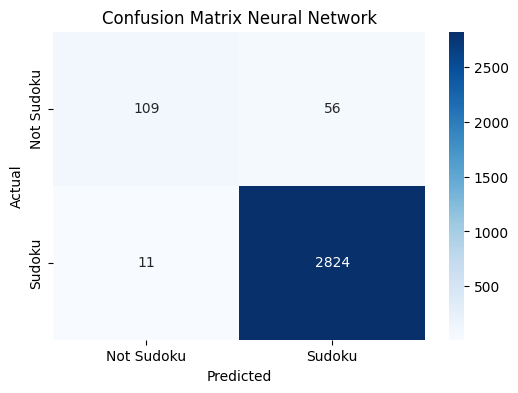

In [31]:
conf_mat = confusion_matrix(y_true, y_pred)
print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
print(conf_mat)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Sudoku', 'Sudoku'], yticklabels=['Not Sudoku', 'Sudoku'])
plt.title('Confusion Matrix Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()